## <span style='color:orange;'> MINI PROJECT-1</span>
### REGRESSION - PREDICTION OF INSURANCE PREMIUM

In [1]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
data_df = pd.read_csv('DS3_C6_S1_Regression_Insurance_Data_Project.csv')

In [3]:
#exploring data
data_df.head(5)

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


In [4]:
data_df.shape

(1338, 8)

In [5]:
data_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,190.000000,53.130000,5.000000,63770.428010


In [6]:
#checking negative and over aged data
for i in data_df['age']:
    if (i<0) | (i>90):
        print(i)

-58
190
-1


In [7]:
#replacing negative and over ages
data_df['age'].replace(to_replace=-1,value=39,inplace=True)
data_df['age'].replace(to_replace=-58,value=39,inplace=True)
data_df['age'].replace(to_replace=190,value=39,inplace=True)

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [9]:
#PREPROCESSING
#checking for null values
data_df.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

##### OBSERVATION : There are 8 null values in classif column.

In [10]:
#imputing values
data_df1=data_df.copy()
data_df1['classif']=data_df1['classif'].fillna(data_df1['classif'].mode()[0])

In [11]:
data_df1['classif'].value_counts()

OB1     395
PREO    383
N       226
OB2     224
OB3      91
UW       19
Name: classif, dtype: int64

In [12]:
#checking for noise
for cols in data_df1.select_dtypes(exclude=[np.number]).columns:
    print(data_df1[cols].value_counts())
    print('-'*20)

male      676
female    662
Name: sex, dtype: int64
--------------------
OB1     395
PREO    383
N       226
OB2     224
OB3      91
UW       19
Name: classif, dtype: int64
--------------------
no     1064
yes     274
Name: smoker, dtype: int64
--------------------
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
--------------------


##### OBSERVATION : There is no noise present.

In [13]:
#Converting object datatype to category 

for cols in data_df1.columns:
    if data_df1[cols].dtype=='object':
        data_df1[cols]=data_df1[cols].astype('category')

In [14]:
data_df1.dtypes

age            int64
sex         category
bmi          float64
classif     category
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [15]:
#Label Encoding 
from sklearn import preprocessing
LB = preprocessing.LabelEncoder()
for cols in data_df1.columns:
    if data_df1[cols].dtype=='category':
        data_df1[cols+'_encoder']=LB.fit_transform(data_df1[cols])

In [16]:
data_df1.dtypes

age                   int64
sex                category
bmi                 float64
classif            category
children              int64
smoker             category
region             category
charges             float64
sex_encoder           int32
classif_encoder       int32
smoker_encoder        int32
region_encoder        int32
dtype: object

In [17]:
#Feature Scaling
scale = preprocessing.MinMaxScaler()
new_df = data_df1.select_dtypes(include=[np.number])
scaled_df=pd.DataFrame(scale.fit_transform(new_df.to_numpy()),columns=new_df.columns)

In [18]:
scaled_df.head(2)

,age,bmi,children,charges,sex_encoder,classif_encoder,smoker_encoder,region_encoder
0,0.296875,0.321227,0.0,0.251611,0.0,0.8,1.0,1.000000
1,0.281250,0.479150,0.2,0.009636,1.0,0.2,0.0,0.666667


### EXLORATORY DATA ANALYSIS (EDA)

In [19]:
data_df.columns

Index(['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

### UNI-VARIATE ANALYSIS

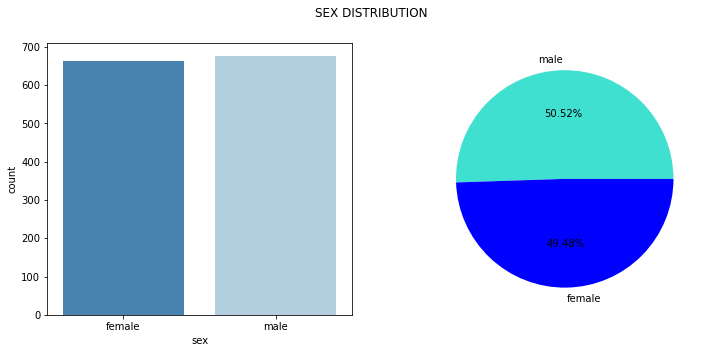

In [20]:
plt.figure(figsize=(12,5))
plt.suptitle('SEX DISTRIBUTION')
plt.subplot(121)
sb.countplot(data_df['sex'],palette='Blues_r')
plt.subplot(122)
perc=data_df['sex'].value_counts()
lbl=list(data_df['sex'].value_counts().index)
plt.pie(perc,labels=lbl,autopct='%.2f%%',colors=['turquoise','blue'])
plt.show()

##### OBSERVATION : Males are slightly more in number.

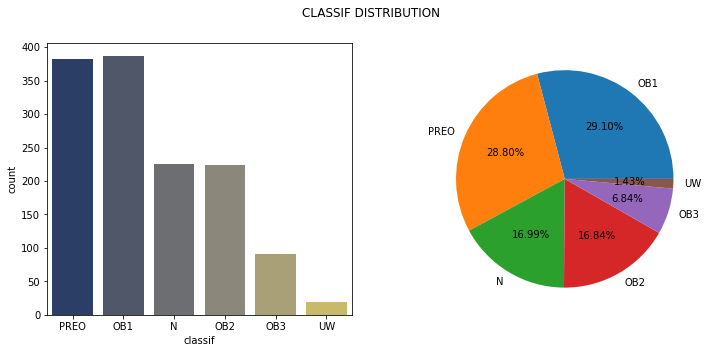

In [21]:
plt.figure(figsize=(12,5))
plt.suptitle('CLASSIF DISTRIBUTION')
plt.subplot(121)
sb.countplot(data_df['classif'],palette='cividis')
plt.subplot(122)
perc=data_df['classif'].value_counts()
lbl=list(data_df['classif'].value_counts().index)
plt.pie(perc,labels=lbl,autopct='%.2f%%')
plt.show()

##### OBSERVATION : OB1 Health Classification is highest in number.

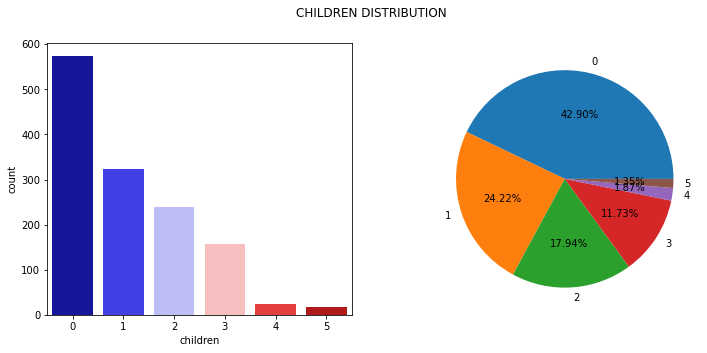

In [22]:
plt.figure(figsize=(12,5))
plt.suptitle('CHILDREN DISTRIBUTION')
plt.subplot(121)
sb.countplot(data_df['children'],palette='seismic')
plt.subplot(122)
perc=data_df['children'].value_counts()
lbl=list(data_df['children'].value_counts().index)
plt.pie(perc,labels=lbl,autopct='%.2f%%')
plt.show()

##### OBSERVATION : People with 0 children are highest in number.

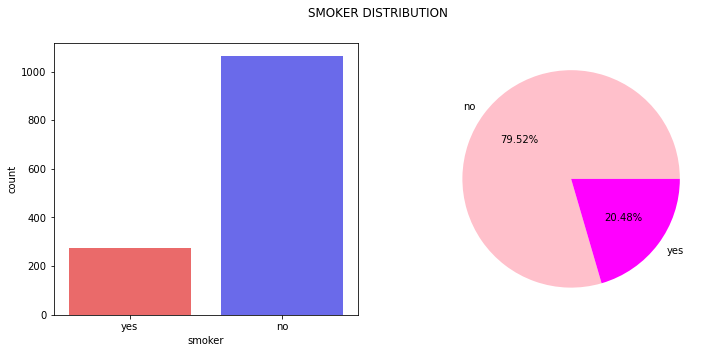

In [23]:
plt.figure(figsize=(12,5))
plt.suptitle('SMOKER DISTRIBUTION')
plt.subplot(121)
sb.countplot(data_df['smoker'],palette='seismic_r')
plt.subplot(122)
perc=data_df['smoker'].value_counts()
lbl=list(data_df['smoker'].value_counts().index)
plt.pie(perc,labels=lbl,autopct='%.2f%%',colors=['pink','magenta'])
plt.show()

##### OBSERVATION : Non-smokers are more in number.

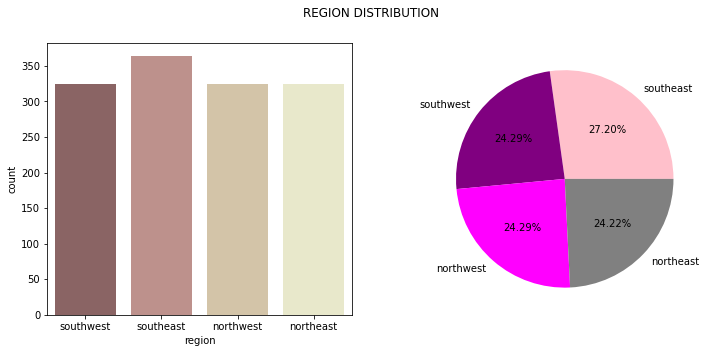

In [24]:
plt.figure(figsize=(12,5))
plt.suptitle('REGION DISTRIBUTION')
plt.subplot(121)
sb.countplot(data_df['region'],palette='pink')
plt.subplot(122)
perc=data_df['region'].value_counts()
lbl=list(data_df['region'].value_counts().index)
plt.pie(perc,labels=lbl,autopct='%.2f%%',colors=['pink','purple','magenta','grey'])
plt.show()

##### OBSERVATION : southeast data is most in number.

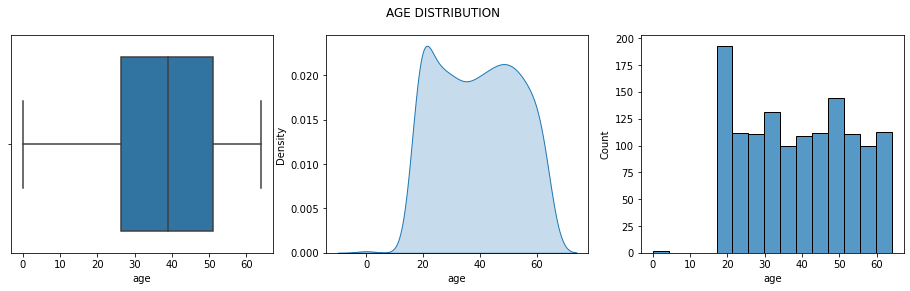

In [25]:
plt.figure(figsize=(16,4))
plt.suptitle('AGE DISTRIBUTION')
plt.subplot(131)
sb.boxplot(data_df['age'])
plt.subplot(132)
sb.kdeplot(data_df['age'],shade=True)
plt.subplot(133)
sb.histplot(data_df['age'])
plt.show()

##### OBSERVATION : Maximum people have age above 20.

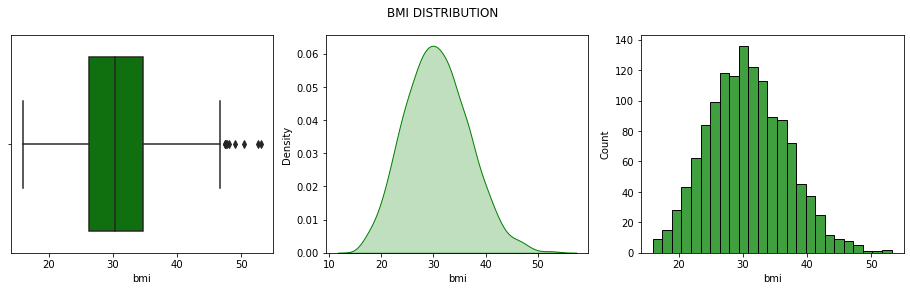

In [26]:
plt.figure(figsize=(16,4))
plt.suptitle('BMI DISTRIBUTION')
plt.subplot(131)
sb.boxplot(data_df['bmi'],color='green')
plt.subplot(132)
sb.kdeplot(data_df['bmi'],shade=True,color='green')
plt.subplot(133)
sb.histplot(data_df['bmi'],color='green')
plt.show()

##### OBSERVATION : Data is normally distributed and there are outliers with extremely high bmi.

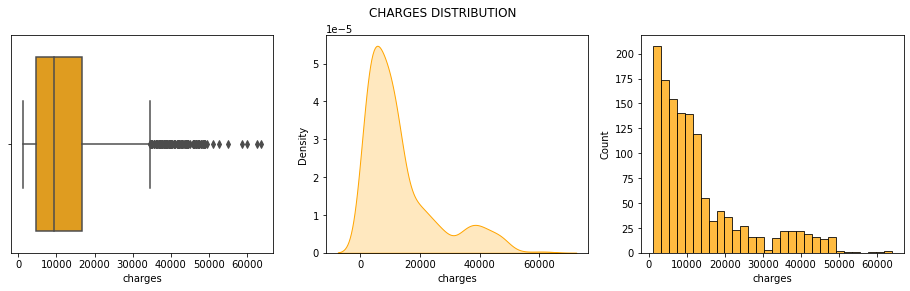

In [27]:
plt.figure(figsize=(16,4))
plt.suptitle('CHARGES DISTRIBUTION')
plt.subplot(131)
sb.boxplot(data_df['charges'],color='orange')
plt.subplot(132)
sb.kdeplot(data_df['charges'],shade=True,color='orange')
plt.subplot(133)
sb.histplot(data_df['charges'],color='orange')
plt.show()

##### OBSERVATION : Data is right skewed. Charges for most people lies below 20000.

### BI-VARIATE ANALYSIS

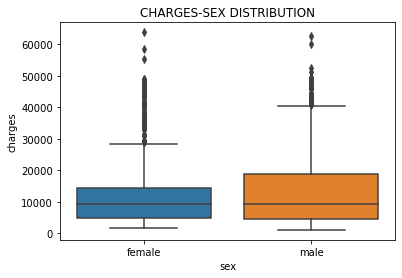

In [28]:
plt.title('CHARGES-SEX DISTRIBUTION')
sb.boxplot(y=data_df['charges'],x=data_df['sex']);

##### OBSERVATION : Male has higher range of charges than females whereas females have more outliers.

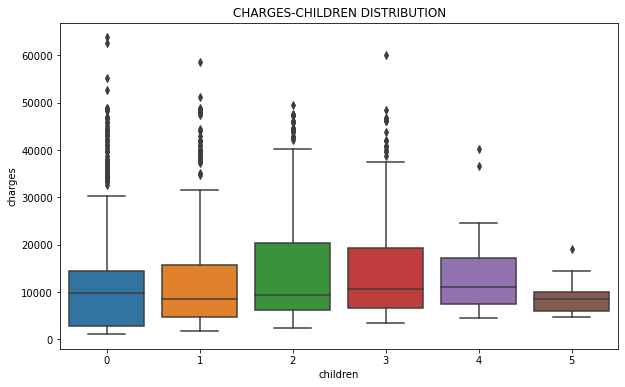

In [29]:
plt.figure(figsize=(10,6))
plt.title('CHARGES-CHILDREN DISTRIBUTION')
sb.boxplot(y=data_df['charges'],x=data_df['children']);

##### OBSERVATION : People with 2 children have higher range of charges whereas people with 0 children have most outliers.

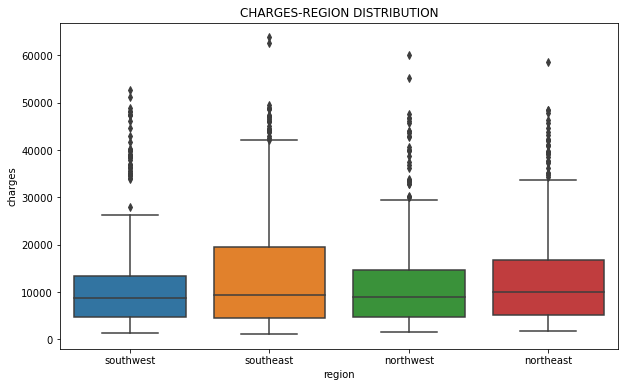

In [30]:
plt.figure(figsize=(10,6))
plt.title('CHARGES-REGION DISTRIBUTION')
sb.boxplot(y=data_df['charges'],x=data_df['region']);

##### OBSERVATION : southeast has highest range of charges whereas other regions have many outliers.

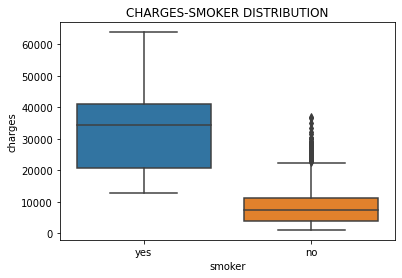

In [31]:
plt.title('CHARGES-SMOKER DISTRIBUTION')
sb.boxplot(y=data_df['charges'],x=data_df['smoker']);

##### OBSERVATION : People who are smokers have higher charges range.

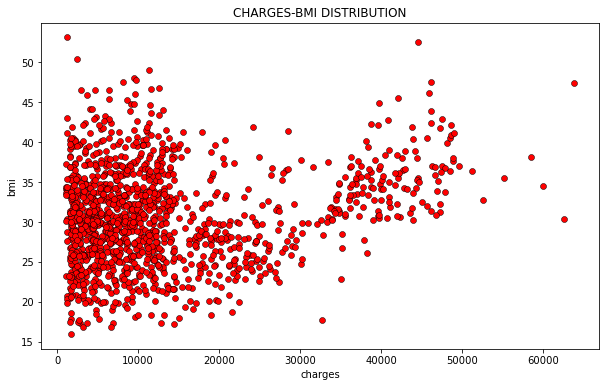

In [32]:
plt.figure(figsize=(10,6))
plt.title('CHARGES-BMI DISTRIBUTION')
sb.scatterplot(y=data_df['bmi'],x=data_df['charges'],ec='black',color='red')
plt.show()

##### OBSERVATION : As bmi increases, charges tend to increase.

<AxesSubplot:title={'center':'CHARGES-AGE DISTRIBUTION'}, xlabel='charges', ylabel='age'>

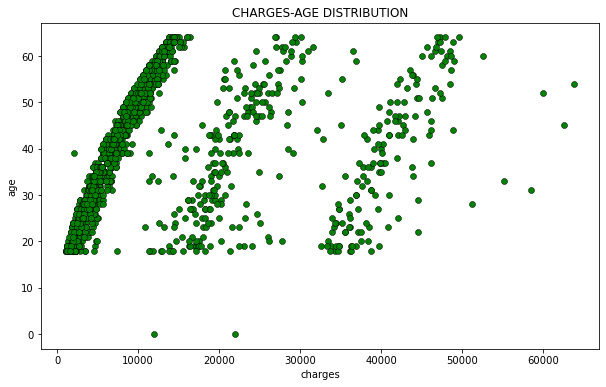

In [33]:
plt.figure(figsize=(10,6))
plt.title('CHARGES-AGE DISTRIBUTION')
sb.scatterplot(x=data_df['charges'],y=data_df['age'],ec='black',color='green')

##### OBSERVATION : No clear relation can be seen here.

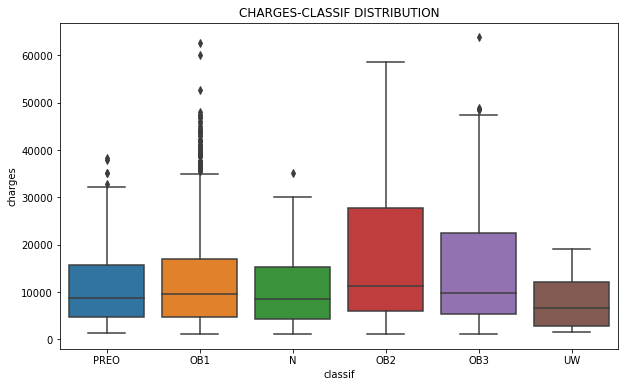

In [34]:
plt.figure(figsize=(10,6))
plt.title('CHARGES-CLASSIF DISTRIBUTION')
sb.boxplot(y=data_df['charges'],x=data_df['classif'])
plt.show()

##### OBSERVATION :OB2 Classification has the highest charges range whereas OB1 has highest charges outliers.

### MULTI-VARIATE ANALYSIS

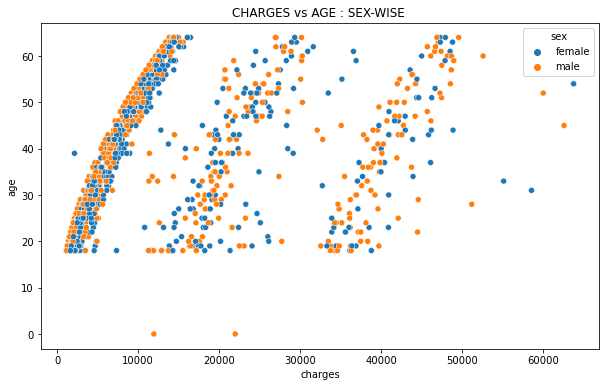

In [35]:
plt.figure(figsize=(10,6))
plt.title('CHARGES vs AGE : SEX-WISE ')
sb.scatterplot(x=data_df['charges'],y=data_df['age'],hue=data_df['sex']);

##### OBSERVATION : Males and females of all ages are equally distributed in terms of charges.

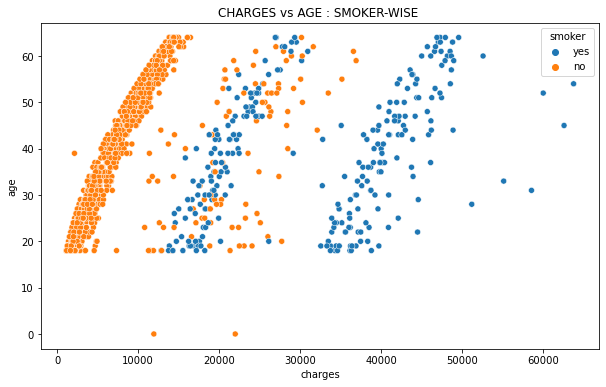

In [36]:
plt.figure(figsize=(10,6))
plt.title('CHARGES vs AGE : SMOKER-WISE ')
sb.scatterplot(x=data_df['charges'],y=data_df['age'],hue=data_df['smoker']);

##### OBSERVATION :Smokers of all ages tend to have more charges.

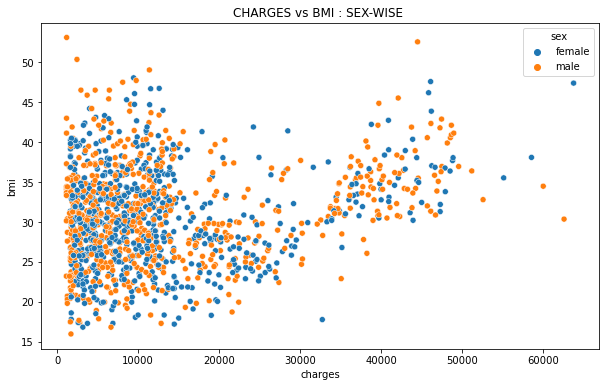

In [37]:
plt.figure(figsize=(10,6))
plt.title('CHARGES vs BMI : SEX-WISE ')
sb.scatterplot(x=data_df['charges'],y=data_df['bmi'],hue=data_df['sex']);

##### OBSERVATION : Males and females of all bmi are equally distributed in terms of charges and is increasing with increase in bmi.

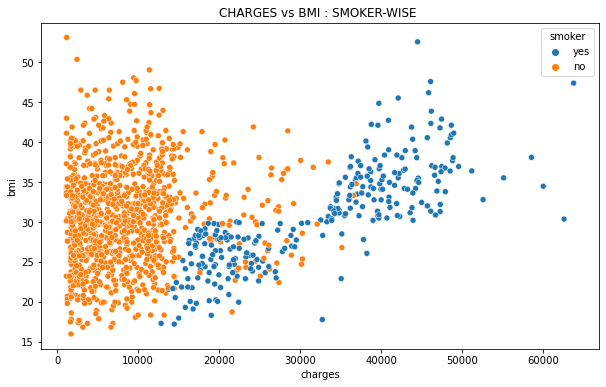

In [38]:
plt.figure(figsize=(10,6))
plt.title('CHARGES vs BMI : SMOKER-WISE ')
sb.scatterplot(x=data_df['charges'],y=data_df['bmi'],hue=data_df['smoker']);

##### OBSERVATION : Non-Smokers of all bmi are mostly concentrated below 20000 range whereas smokers have more charges and charges increases as bmi increases.

<AxesSubplot:>

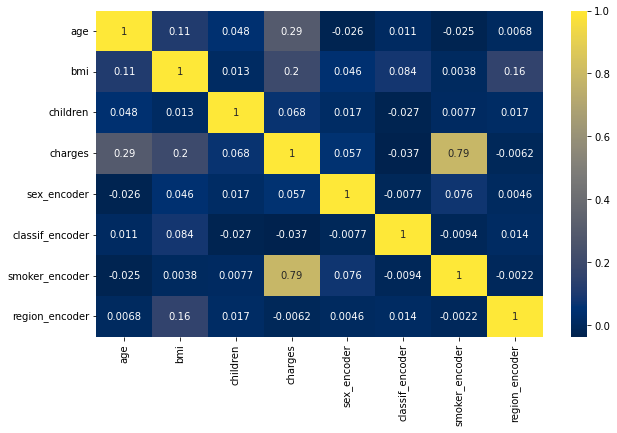

In [75]:
#CORRELATION GRAPH
plt.figure(figsize=(10,6))
sb.heatmap(scaled_df.corr(),annot=True,cmap='cividis')

##### PRIORITY BASED ON CORRELATION WITH CHARGES FEATURE :
##### <span style='color:green;'>1. Charges - Smoker : 0.79</span>
#####  <span style='color:green;'>2. Charges - Age    : 0.29</span>
##### <span style='color:green;'>3. Charges - BMI    : 0.2</span>
##### <span style='color:green;'>4. Charges - Children : 0.068</span>
##### <span style='color:red;'>5. Charges - Sex    : 0.057 </span>
##### <span style='color:red;'>6. Charges - Classif : -0.037</span>
##### <span style='color:red;'>7. Charges - Region : -0.0062</span>

In [40]:
#splitting using train-test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [90]:
#MULTIPLE FEATURES LINEAR REGRESSION
features=['age','bmi','smoker_encoder','children']
x=scaled_df[features]
y=scaled_df['charges']

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)    #train-test split

In [43]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(402, 4)
(936, 4)
(402,)
(936,)


In [44]:
model = LinearRegression().fit(x_train,y_train)   #training

In [45]:
coeff_of_det = model.score(x_train,y_train)  #R^2
coeff_of_det.round(2)

0.75

In [46]:
x_test

,age,bmi,smoker_encoder,children
559,0.296875,0.526500,0.0,0.0
1087,0.890625,0.419155,0.0,0.0
1020,0.796875,0.566048,0.0,0.0
460,0.765625,0.556094,0.0,0.6
802,0.328125,0.170568,0.0,0.2
...,...,...,...,...
323,0.890625,0.672182,0.0,0.0
1268,0.312500,0.466505,0.0,0.0
134,0.312500,0.345036,0.0,0.0
1274,0.406250,0.298628,1.0,0.0


In [47]:
y_predict = model.predict(x_test)                        #predicted values
y_predict

array([ 0.05387534,  0.18637466,  0.18907049,  0.19493522,  0.00241116,
        0.49566649,  0.19401328,  0.16797456,  0.03942599,  0.46492563,
        0.16409926,  0.25894988,  0.12873172,  0.11917637,  0.04449654,
        0.15427007, -0.08483821,  0.09526783,  0.22395012,  0.21449256,
        0.17473472,  0.5144518 ,  0.12379162,  0.13421841,  0.02339791,
        0.11226683,  0.12560722,  0.15912496,  0.1074685 ,  0.04863961,
        0.20842891,  0.08262009,  0.52607211,  0.41991205,  0.52191325,
        0.13507081,  0.48044145,  0.41839832,  0.2270958 ,  0.52217519,
        0.0879563 ,  0.20431026,  0.15590696,  0.22678609,  0.05399475,
        0.18397549,  0.06202464,  0.45474063,  0.09641255,  0.19380294,
        0.20252228,  0.1798269 ,  0.01581249,  0.12549095,  0.39884001,
        0.14836899,  0.53472131,  0.21578234,  0.02504889,  0.08644932,
        0.09387766,  0.21213035,  0.42436643,  0.03364432,  0.22485255,
        0.15931345,  0.15611179,  0.15463406,  0.00568123,  0.38

In [48]:
MSE = mean_squared_error(y_test,y_predict)
MAE = mean_absolute_error(y_test,y_predict)
RMSE  = mean_squared_error(y_test,y_predict,squared=False)
print(round(MSE,2),round(MAE,2),round(RMSE,2))

0.01 0.07 0.1


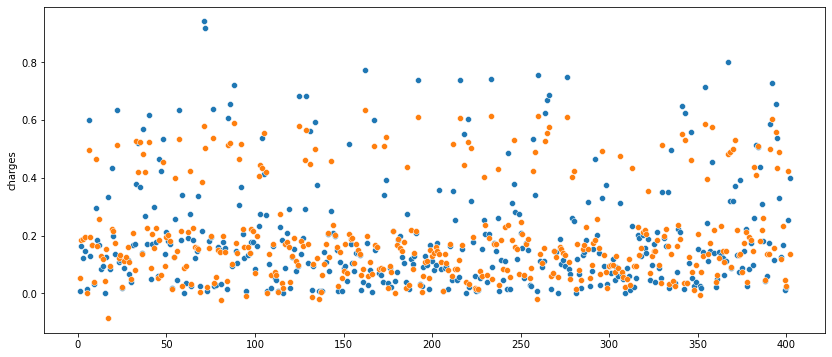

In [49]:
#PREDICTED-TEST VALUES SCATTER PLOT
plt.figure(figsize=(14,6))
k=np.arange(1,len(y_test)+1)
sb.scatterplot(x=k,y=y_test)
sb.scatterplot(x=k,y=y_predict);

In [83]:
#AGE-CHARGES LINEAR REGRESSION
x=scaled_df['age'].values.reshape(-1,1)
y=scaled_df['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
model = LinearRegression().fit(x_train,y_train)   #training
coeff_of_det = model.score(x_train,y_train)  #R^2
y_predict = model.predict(x_test) 
MSE = mean_squared_error(y_test,y_predict)
MAE = mean_absolute_error(y_test,y_predict)
RMSE  = mean_squared_error(y_test,y_predict,squared=False)
print('R^2:',coeff_of_det.round(2),'MSE:',round(MSE,2),'MAE:',round(MAE,2),'RMSE:',round(RMSE,2))

R^2: 0.09 MSE: 0.03 MAE: 0.14 RMSE: 0.18


In [84]:
#BMI-CHARGES LINEAR REGRESSION
x=scaled_df['bmi'].values.reshape(-1,1)
y=scaled_df['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
model = LinearRegression().fit(x_train,y_train)   #training
coeff_of_det = model.score(x_train,y_train)  #R^2
y_predict = model.predict(x_test) 
MSE = mean_squared_error(y_test,y_predict)
MAE = mean_absolute_error(y_test,y_predict)
RMSE  = mean_squared_error(y_test,y_predict,squared=False)
print('R^2:',coeff_of_det.round(2),'MSE:',round(MSE,2),'MAE:',round(MAE,2),'RMSE:',round(RMSE,2))

R^2: 0.04 MSE: 0.03 MAE: 0.14 RMSE: 0.19


In [85]:
#SMOKER-CHARGES LINEAR REGRESSION
x=scaled_df['smoker_encoder'].values.reshape(-1,1)
y=scaled_df['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
model = LinearRegression().fit(x_train,y_train)   #training
coeff_of_det = model.score(x_train,y_train)  #R^2
y_predict = model.predict(x_test) 
MSE = mean_squared_error(y_test,y_predict)
MAE = mean_absolute_error(y_test,y_predict)
RMSE  = mean_squared_error(y_test,y_predict,squared=False)
print('R^2:',coeff_of_det.round(2),'MSE:',round(MSE,2),'MAE:',round(MAE,2),'RMSE:',round(RMSE,2))

R^2: 0.63 MSE: 0.01 MAE: 0.09 RMSE: 0.12


In [87]:
#CHILDREN-CHARGES LINEAR REGRESSION
x=scaled_df['children'].values.reshape(-1,1)
y=scaled_df['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
model = LinearRegression().fit(x_train,y_train)   #training
coeff_of_det = model.score(x_train,y_train)  #R^2
y_predict = model.predict(x_test) 
MSE = mean_squared_error(y_test,y_predict)
MAE = mean_absolute_error(y_test,y_predict)
RMSE  = mean_squared_error(y_test,y_predict,squared=False)
print('R^2:',coeff_of_det.round(3),'MSE:',round(MSE,2),'MAE:',round(MAE,2),'RMSE:',round(RMSE,2))

R^2: 0.001 MSE: 0.04 MAE: 0.14 RMSE: 0.19


In [92]:
#DECISION TREE 
from sklearn.tree import DecisionTreeRegressor
dtm = DecisionTreeRegressor()
s_model2 = dtm.fit(x_train, y_train)
y_predict2 = s_model2.predict(x_test)             #predicted values

print(s_model2.score(x_train,y_train).round(2))             #train accuracy
print(s_model2.score(x_test,y_test).round(2))               #test accuracy

1.0
0.63


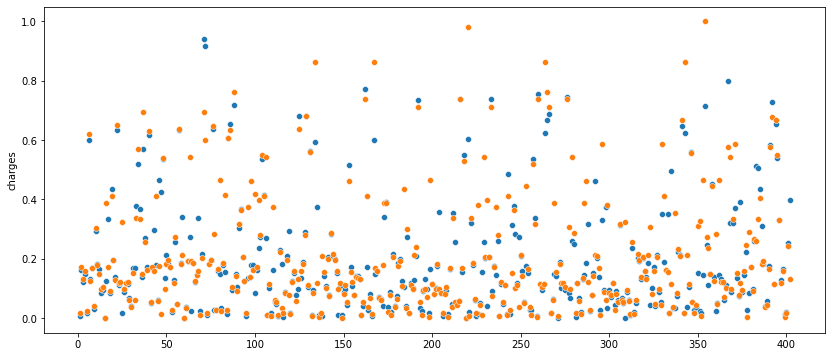

In [60]:
#PREDICTED-TEST VALUES SCATTER PLOT
plt.figure(figsize=(14,6))
k=np.arange(1,len(y_test)+1)
sb.scatterplot(x=k,y=y_test)
sb.scatterplot(x=k,y=y_predict2);

In [ ]:
#TUNING THE DEPTH OF TREE

In [61]:
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=4, shuffle=False, random_state=None)
for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 1), x, y, cv= kf,scoring="r2") 
    print(f'For max depth: {val}')
    print('r2 score :',score.mean())

For max depth: 1
r2 score : 0.6161728096033987
For max depth: 2
r2 score : 0.8190256393858212
For max depth: 3
r2 score : 0.840448244426758
For max depth: 4
r2 score : 0.8364311103323004
For max depth: 5
r2 score : 0.8243052443475234
For max depth: 6
r2 score : 0.8182682552122751
For max depth: 7
r2 score : 0.7950885887183963
For max depth: 8
r2 score : 0.7737111575946736
For max depth: 9
r2 score : 0.7530719349808777
For max depth: 10
r2 score : 0.7323881510088657
For max depth: 11
r2 score : 0.7123942938721932
For max depth: 12
r2 score : 0.6946042335626927
For max depth: 13
r2 score : 0.685449158771376
For max depth: 14
r2 score : 0.6834725197592681
For max depth: 15
r2 score : 0.6771833609149631


In [62]:
dtm = DecisionTreeRegressor(max_depth=4)
s_model_dtm = dtm.fit(x_train, y_train)
y_predict_dtm = s_model_dtm.predict(x_test)
s_model_dtm.score(x_train,y_train).round(2)

0.87

In [99]:
#ACTUAL VS PREDICTED VALUES
data = pd.DataFrame()
data['Actual Values']=y_test
data['Predicted Values']=y_predict_dtm
data.head()

,Actual Values,Predicted Values
559,0.008373,0.037595
1087,0.163313,0.194519
1020,0.122536,0.129348
460,0.147802,0.150527
802,0.015662,0.037595


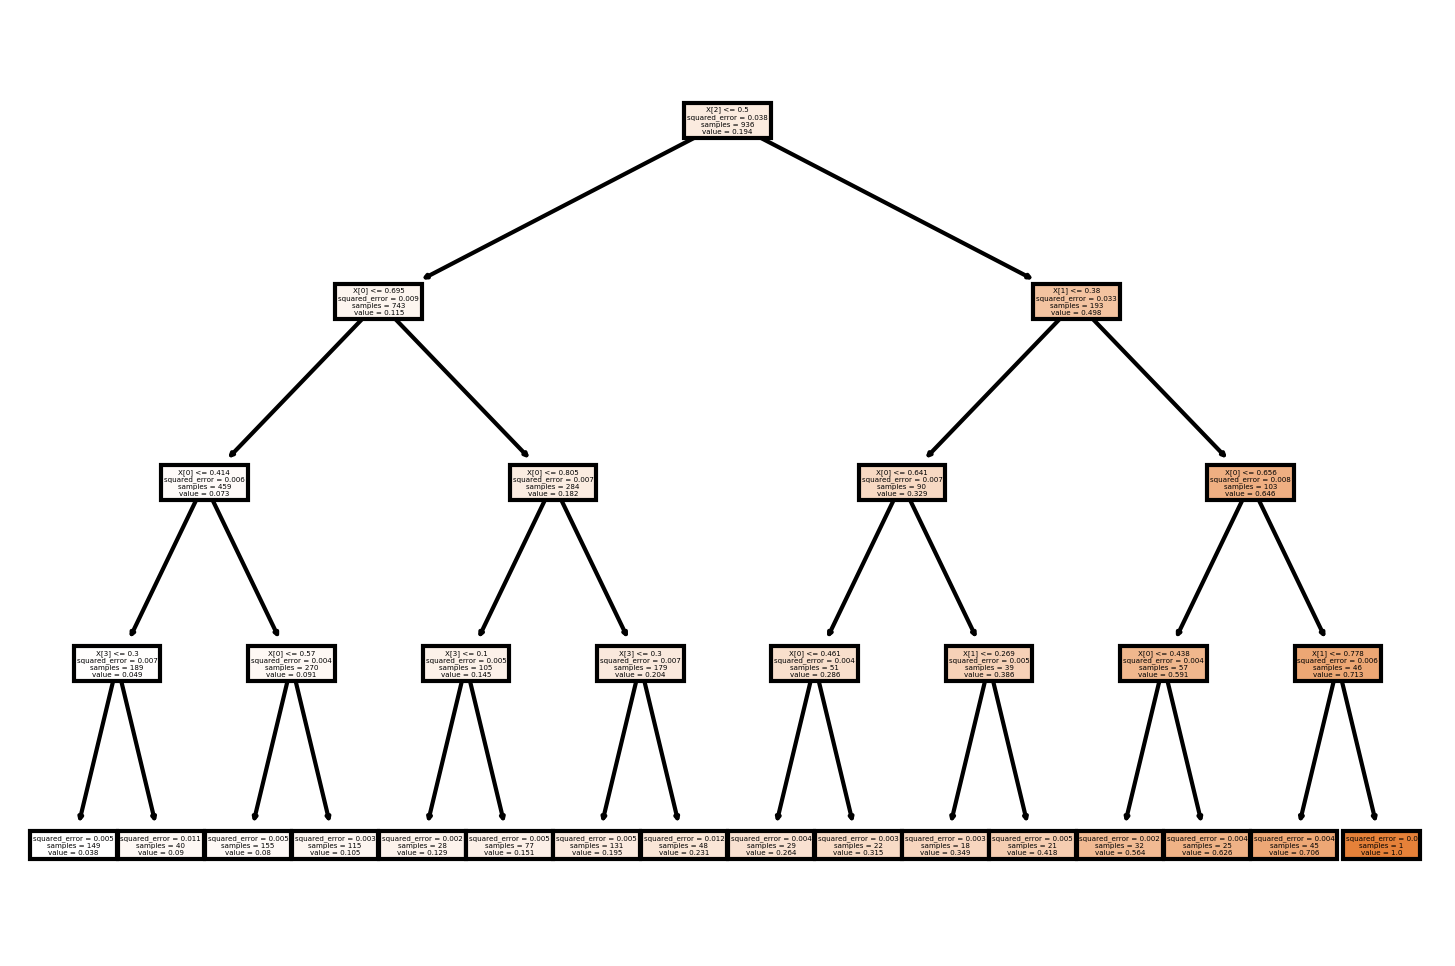

In [108]:
#DECISION TREE
from sklearn import tree
fig, axes = plt.subplots(nrows=1,ncols=1,dpi=300)
tree.plot_tree(s_model_dtm,filled = True);

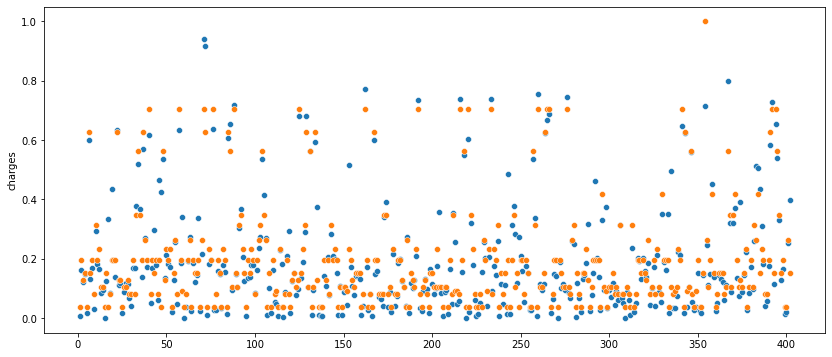

In [63]:
#PREDICTED-TEST VALUES SCATTER PLOT
plt.figure(figsize=(14,6))
k=np.arange(1,len(y_test)+1)
sb.scatterplot(x=k,y=y_test)
sb.scatterplot(x=k,y=y_predict_dtm);

In [93]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(oob_score=True) 
s_model3 = regressor.fit(x_train, y_train)
print(s_model3.score(x_train,y_train).round(2))
print(s_model3.score(x_test,y_test).round(2))

0.98
0.82


In [94]:
s_model3.oob_score_.round(2)                   #OOB SCORE

0.82

In [66]:
y_predict3 = s_model3.predict(x_test)   #PREDICTED VALUES

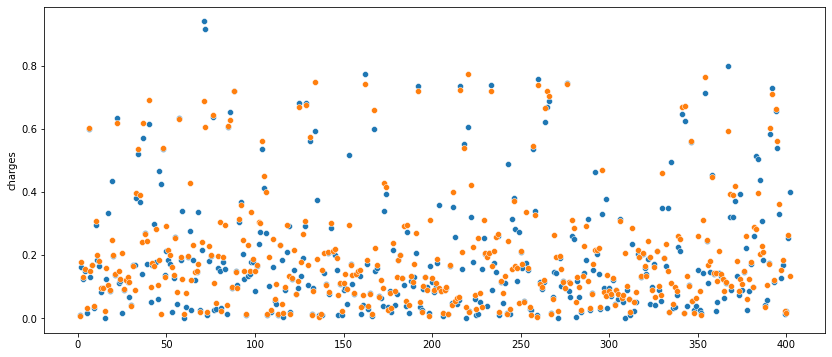

In [67]:
#PREDICTED-TEST VALUES SCATTER PLOT
plt.figure(figsize=(14,6))
k=np.arange(1,len(y_test)+1)
sb.scatterplot(x=k,y=y_test)
sb.scatterplot(x=k,y=y_predict3);

In [ ]:
# Hyperparameter tuning for Random Forest using GridSearchCV

In [68]:
# defining model
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
# defining model parameters
params_rf = {'max_depth': [2,3,5,10,20],'min_samples_leaf': [5,10,20,50,100,200],'n_estimators': [10,25,30,50,100,200]}
# defining grid search model
grid_search = GridSearchCV(estimator=rf,param_grid=params_rf,cv = 4,n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [69]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestRegressor(max_depth=2, min_samples_leaf=5, n_estimators=10,
                      n_jobs=-1, random_state=42)

In [95]:
regressor = RandomForestRegressor(max_depth=2, min_samples_leaf=5, n_estimators=10,n_jobs=-1, random_state=42,oob_score=True) 
s_model11 = regressor.fit(x_train, y_train)
y_predict11 = s_model11.predict(x_test)
s_model11.score(x_train,y_train).round(2)

0.83

In [96]:
s_model11.oob_score_.round(2)                   #OOB SCORE

0.81

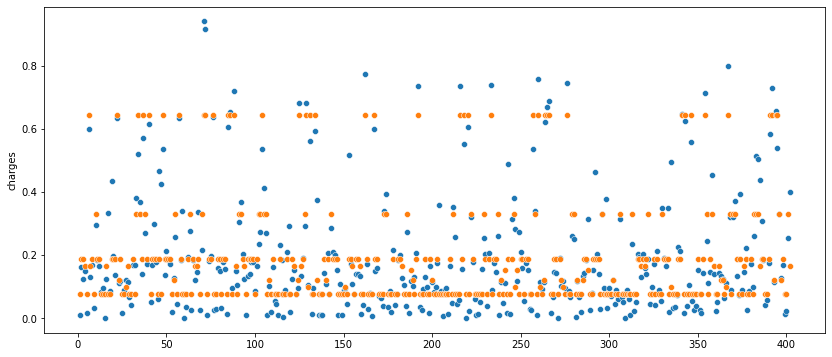

In [71]:
plt.figure(figsize=(14,6))
k=np.arange(1,len(y_test)+1)
sb.scatterplot(x=k,y=y_test)
sb.scatterplot(x=k,y=y_predict11);

In [104]:
#R^2 VALUE DATAFRAME
show_df = pd.DataFrame()
show_df['Model']=['All Features Linear Regression','Linear Regression (Age & Charges)','Linear Regression (BMI & Charges)','Linear Regression (Smoker & Charges)','Linear Regression (Children & Charges)','Decision Tree','Decision Tree (TUNING)','Random Forest Regressor','Random Forest Regressor (TUNING)']
show_df['R^2 Value']=['0.75','0.09','0.4','0.63','0.001', '1.0','0.87','0.98','0.83']

In [105]:
show_df

,Model,R^2 Value
0,All Features Linear Regression,0.75
1,Linear Regression (Age & Charges),0.09
2,Linear Regression (BMI & Charges),0.4
3,Linear Regression (Smoker & Charges),0.63
4,Linear Regression (Children & Charges),0.001
5,Decision Tree,1.0
6,Decision Tree (TUNING),0.87
7,Random Forest Regressor,0.98
8,Random Forest Regressor (TUNING),0.83


##### -> <span style='color:red;'>DECISION TREE REGRESSOR (TUNING) </span>  has the highest accuracy, therefore it's the best model.